In [7]:
import os
from scipy.io import loadmat
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
# the following import is required for matplotlib < 3.2:
from mpl_toolkits.mplot3d import Axes3D  # noqa
import mne

In [8]:
# read the EEG data
subject_id = '1'
file_path = os.path.join('..', '..', 'data', subject_id, 'eeg_before.mat')
eeg_before = loadmat(file_path)['eeg']
print(eeg_before)

[[ 0.00000000e+00  8.33333333e-04  1.66666667e-03 ...  6.97278333e+02
   6.97279167e+02  6.97280000e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -5.94182422e+03
  -5.94620459e+03 -5.95058105e+03]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -6.45815048e+01
  -6.77019730e+01 -7.08251038e+01]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -9.41492493e+02
  -9.45020508e+02 -9.48558533e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -2.38248120e+03
  -2.38316870e+03 -2.38389795e+03]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


In [23]:
# get montage of standard 10-20 EEG system
# Create the standard 10-20 montage
montage_1020 = mne.channels.make_standard_montage('standard_1020')
# Get the channel positions in the 'head' coordinate frame
positions_1020 = montage_1020._get_ch_pos()
# Get the elec_coords dictionary
elec_coords_1020 = {ch_name: coord for ch_name, coord in channel_positions.items() if ch_name in montage_1020.ch_names}

In [ ]:
# create info object
# Define channel names and types
ch_names = ['Time'] + [f'Ch{i}' for i in range(1, 33)] + ['Trigger']
ch_types = ['misc'] + ['eeg'] * 32 + ['stim']
# Create the info object
info = mne.create_info(ch_names, sfreq=1200, ch_types=ch_types)
raw = mne.io.RawArray(eeg_before, info)

In [9]:
builtin_montages = mne.channels.get_builtin_montages(descriptions=True)
for montage_name, montage_description in builtin_montages:
    print(f'{montage_name}: {montage_description}')

standard_1005: Electrodes are named and positioned according to the international 10-05 system (343+3 locations)
standard_1020: Electrodes are named and positioned according to the international 10-20 system (94+3 locations)
standard_alphabetic: Electrodes are named with LETTER-NUMBER combinations (A1, B2, F4, …) (65+3 locations)
standard_postfixed: Electrodes are named according to the international 10-20 system using postfixes for intermediate positions (100+3 locations)
standard_prefixed: Electrodes are named according to the international 10-20 system using prefixes for intermediate positions (74+3 locations)
standard_primed: Electrodes are named according to the international 10-20 system using prime marks (' and '') for intermediate positions (100+3 locations)
biosemi16: BioSemi cap with 16 electrodes (16+3 locations)
biosemi32: BioSemi cap with 32 electrodes (32+3 locations)
biosemi64: BioSemi cap with 64 electrodes (64+3 locations)
biosemi128: BioSemi cap with 128 electrodes (1

In [21]:
standard_1020 = mne.channels.make_standard_montage('standard_1020')
print(standard_1020)

<DigMontage | 0 extras (headshape), 0 HPIs, 3 fiducials, 94 channels>


4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.


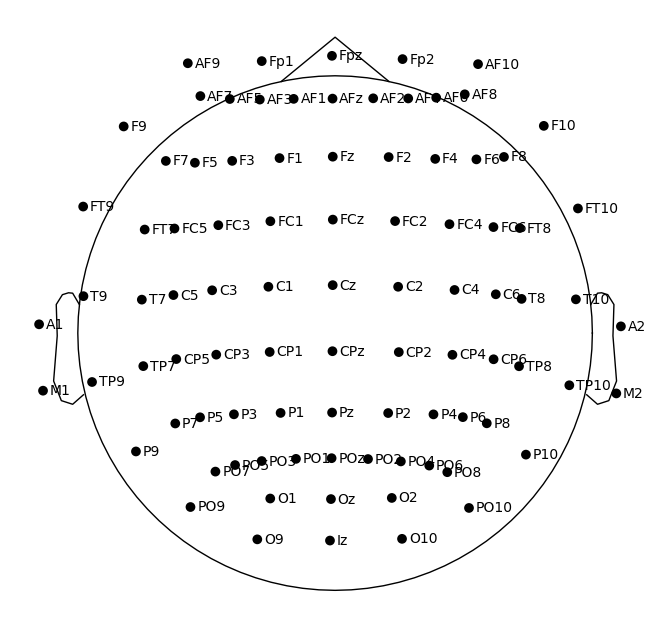

4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.


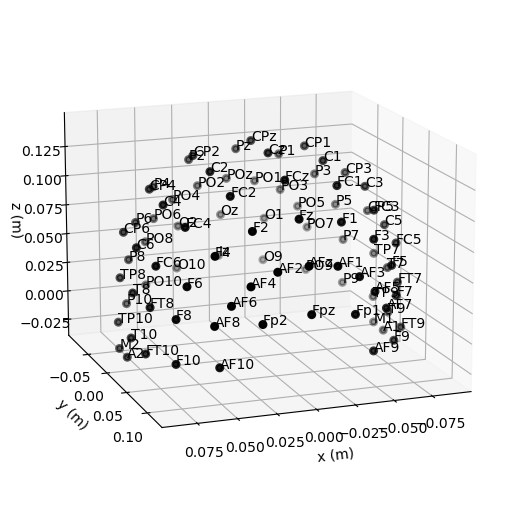

In [22]:
standard_1020.plot()  # 2D
fig = standard_1020.plot(kind='3d', show=False)  # 3D
fig = fig.gca().view_init(azim=70, elev=15)  # set view angle for tutorial

In [15]:
# Create the standard 10-20 montage
montage_1020 = mne.channels.make_standard_montage('standard_1020')

# Get the channel positions in the 'head' coordinate frame
channel_positions = montage_1020._get_ch_pos()

# Get the elec_coords dictionary
elec_coords = {ch_name: coord for ch_name, coord in channel_positions.items() if ch_name in montage_1020.ch_names}

# Print the elec_coords dictionary
print(elec_coords)

{'Fp1': array([-0.0294367,  0.0839171, -0.00699  ]), 'Fpz': array([ 0.0001123,  0.088247 , -0.001713 ]), 'Fp2': array([ 0.0298723,  0.0848959, -0.00708  ]), 'AF9': array([-0.0489708,  0.0640872, -0.047683 ]), 'AF7': array([-0.0548397,  0.0685722, -0.01059  ]), 'AF5': array([-0.0454307,  0.0728622,  0.005978 ]), 'AF3': array([-0.0337007,  0.0768371,  0.021227 ]), 'AF1': array([-0.0184717,  0.0799041,  0.032752 ]), 'AFz': array([0.0002313, 0.080771 , 0.035417 ]), 'AF2': array([0.0198203, 0.0803019, 0.032764 ]), 'AF4': array([0.0357123, 0.0777259, 0.021956 ]), 'AF6': array([0.0465843, 0.0738078, 0.006034 ]), 'AF8': array([ 0.0557433,  0.0696568, -0.010755 ]), 'AF10': array([ 0.0504352,  0.0638698, -0.048005 ]), 'F9': array([-0.0701019,  0.0416523, -0.049952 ]), 'F7': array([-0.0702629,  0.0424743, -0.01142  ]), 'F5': array([-0.0644658,  0.0480353,  0.016921 ]), 'F3': array([-0.0502438,  0.0531112,  0.042192 ]), 'F1': array([-0.0274958,  0.0569311,  0.060342 ]), 'Fz': array([0.0003122, 0.0

In [18]:
print(elec_coords['Fp1'])

[-0.0294367  0.0839171 -0.00699  ]
